In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_tromso = pd.read_csv('../datasets/tromso.csv', delimiter=';', decimal=',')
df_oslo = pd.read_csv('../datasets/oslo.csv', delimiter=';', decimal=',')
df = pd.concat([df_tromso, df_oslo], axis=0)

In [4]:
# Unfitted x and y data
# We must use a numerical x-variable for the fitting
y = df_tromso['max temperature']
x = df_tromso['date'].index

Maximum: 14.755087322159202
Minimum: -1.2576513248599


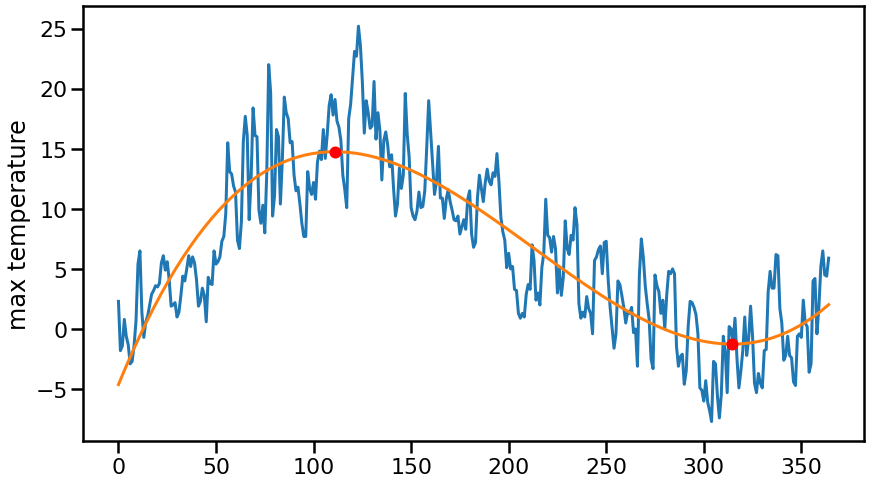

In [7]:
# Make the polynomial using the numpy Polynomial class
poly = np.polynomial.Polynomial.fit(x, y, deg=3)
xfit, yfit = poly.linspace()

# Calculate the derivative of our fitted polynomial
# and get extrema
diff = poly.deriv()
extrema = [(root, poly(root)) for root in diff.roots()]

sns.set_context('poster')
fig, ax = plt.subplots(figsize=(14, 8))

sns.lineplot(x=x, y=y)
sns.lineplot(x=xfit, y=yfit)

for rootx, rooty in extrema:
    # Ignore roots outside the domain
    # and ignore complex roots
    
    if rootx.imag != 0.0:
        continue
    elif not poly.domain.min() < rootx.real < poly.domain.max():
        continue
    
    ax.scatter(x=rootx, y=rooty, color='red', s=100, zorder=3)
    
    if diff.deriv()(rootx) < 0:
        print(f'Maximum: {rooty}')
    else:
        print(f'Minimum: {rooty}')